<a href="https://colab.research.google.com/github/dunkdumb/loan-prediction-analysis/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_approval.csv')
display(df.head())

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [ ]:
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Drop rows with missing values if the number is small
df.dropna(inplace=True)

missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

Missing values before handling:
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

Missing values after handling:
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)
display(df.head())

,income,credit_score,loan_amount,years_employed,points,loan_approved,name_Aaron Armstrong,name_Aaron Barber,name_Aaron Gonzalez,name_Aaron Jennings,...,city_Wilsonton,city_Wilsonview,city_Wongburgh,city_Woodsburgh,city_Wrightchester,city_Yatesbury,city_Youngbury,city_Yumouth,city_Zacharyton,city_Zamoramouth
0,113810,389,39698,27,50.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,44592,729,15446,28,55.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,33278,584,11189,13,45.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,127196,344,48823,29,50.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,66048,496,47174,4,25.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,income,credit_score,loan_amount,years_employed,points,loan_approved,name_Aaron Armstrong,name_Aaron Barber,name_Aaron Gonzalez,name_Aaron Jennings,...,city_Wilsonton,city_Wilsonview,city_Wongburgh,city_Woodsburgh,city_Wrightchester,city_Yatesbury,city_Youngbury,city_Yumouth,city_Zacharyton,city_Zamoramouth
0,0.673565,-1.152134,1.013076,0.557034,-0.358497,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.333961,0.965919,-0.694358,0.641960,-0.090161,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.662100,0.062632,-0.994067,-0.631939,-0.626832,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.061799,-1.432464,1.655511,0.726887,-0.358497,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.711674,-0.485570,1.539415,-1.396279,-1.700175,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
display(df_pca.head())

,0,1,2,3,4,5,6,7,8,9,...,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577
0,-0.916185,1.286589,0.790346,0.483730,0.154020,-0.260106,-0.004010,2.672188e-17,-3.767518e-17,-6.510976e-17,...,-1.705144e-18,2.509409e-16,6.965977e-17,-5.870605e-17,1.238316e-16,-1.437173e-16,1.219317e-17,8.501422e-17,-6.286445e-17,4.572890e-17
1,0.144508,-1.777530,0.419032,-0.029727,-0.629989,-0.250369,-0.001440,5.599182e-16,2.636569e-15,-4.973957e-15,...,-1.899323e-03,-5.794724e-04,-1.157776e-03,-4.918545e-04,-1.425319e-03,-2.074837e-03,-5.703429e-05,2.398644e-06,4.448713e-04,-3.280965e-03
2,-0.938600,-1.754799,-0.779637,-0.322813,-0.148449,-0.225687,-0.002775,1.018447e-15,2.614753e-15,5.964476e-16,...,-3.952911e-03,-1.205003e-03,-1.713619e-03,-9.399699e-04,2.546000e-03,-2.956007e-03,-3.009973e-03,1.802223e-03,1.453394e-04,-1.983899e-03
3,-1.038603,1.966721,1.209479,0.456010,0.284297,-0.282851,-0.002850,1.675711e-15,-2.266952e-15,5.078312e-15,...,5.341492e-04,-3.187420e-03,5.886019e-04,-2.698020e-03,1.038433e-03,-1.233355e-04,-2.597909e-03,-5.166483e-04,8.049923e-05,-1.587356e-03
4,-2.185158,0.477619,-0.034789,-1.755980,-0.075928,0.242479,0.002423,3.430441e-15,-2.064123e-14,9.603272e-15,...,-2.541461e-03,-6.484391e-04,-2.480888e-03,-2.173988e-03,5.861652e-03,-1.467760e-03,-4.854847e-03,6.775637e-04,-5.449960e-03,3.920915e-03


In [ ]:
X = df_pca
y = df['loan_approved']
display(X.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,...,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577
0,-0.916185,1.286589,0.790346,0.483730,0.154020,-0.260106,-0.004010,2.672188e-17,-3.767518e-17,-6.510976e-17,...,-1.705144e-18,2.509409e-16,6.965977e-17,-5.870605e-17,1.238316e-16,-1.437173e-16,1.219317e-17,8.501422e-17,-6.286445e-17,4.572890e-17
1,0.144508,-1.777530,0.419032,-0.029727,-0.629989,-0.250369,-0.001440,5.599182e-16,2.636569e-15,-4.973957e-15,...,-1.899323e-03,-5.794724e-04,-1.157776e-03,-4.918545e-04,-1.425319e-03,-2.074837e-03,-5.703429e-05,2.398644e-06,4.448713e-04,-3.280965e-03
2,-0.938600,-1.754799,-0.779637,-0.322813,-0.148449,-0.225687,-0.002775,1.018447e-15,2.614753e-15,5.964476e-16,...,-3.952911e-03,-1.205003e-03,-1.713619e-03,-9.399699e-04,2.546000e-03,-2.956007e-03,-3.009973e-03,1.802223e-03,1.453394e-04,-1.983899e-03
3,-1.038603,1.966721,1.209479,0.456010,0.284297,-0.282851,-0.002850,1.675711e-15,-2.266952e-15,5.078312e-15,...,5.341492e-04,-3.187420e-03,5.886019e-04,-2.698020e-03,1.038433e-03,-1.233355e-04,-2.597909e-03,-5.166483e-04,8.049923e-05,-1.587356e-03
4,-2.185158,0.477619,-0.034789,-1.755980,-0.075928,0.242479,0.002423,3.430441e-15,-2.064123e-14,9.603272e-15,...,-2.541461e-03,-6.484391e-04,-2.480888e-03,-2.173988e-03,5.861652e-03,-1.467760e-03,-4.854847e-03,6.775637e-04,-5.449960e-03,3.920915e-03


,loan_approved
0,False
1,False
2,False
3,False
4,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 1578)
X_test shape: (400, 1578)
y_train shape: (1600,)
y_test shape: (400,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9925
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       217
        True       1.00      0.98      0.99       183

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Confusion Matrix:
[[217   0]
 [  3 180]]


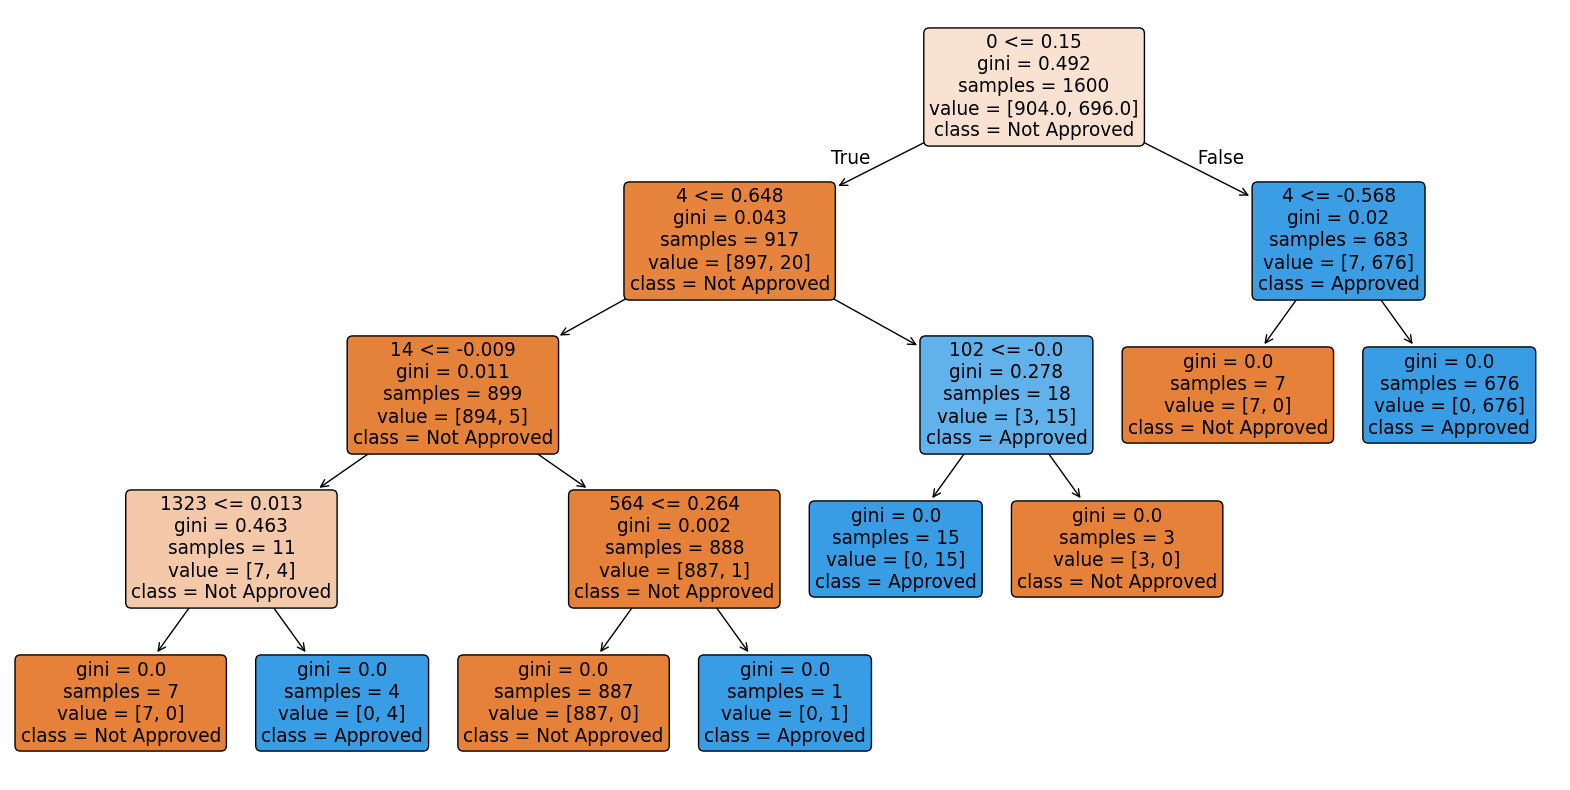

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn import tree

n_nodes = model.tree_.node_count
feature_names = X.columns
rules = []

def extract_rules(node_id, conditions):
    if model.tree_.children_left[node_id] == model.tree_.children_right[node_id]:
        # Leaf node
        class_index = model.tree_.value[node_id].argmax()
        predicted_class = model.classes_[class_index]
        rules.append((conditions, predicted_class))
    else:
        # Decision node
        feature = feature_names[model.tree_.feature[node_id]]
        threshold = model.tree_.threshold[node_id]

        # Left child
        left_conditions = conditions + [(feature, '<=', threshold)]
        extract_rules(model.tree_.children_left[node_id], left_conditions)

        # Right child
        right_conditions = conditions + [(feature, '>', threshold)]
        extract_rules(model.tree_.children_right[node_id], right_conditions)

extract_rules(0, [])

for i, (conditions, predicted_class) in enumerate(rules):
    rule_str = f"Rule {i+1}: IF "
    for j, (feature, operator, value) in enumerate(conditions):
        rule_str += f"{feature} {operator} {value:.2f}"
        if j < len(conditions) - 1:
            rule_str += " AND "
    rule_str += f" THEN loan_approved is {predicted_class}"
    print(rule_str)

Rule 1: IF 0 <= 0.15 AND 4 <= 0.65 AND 14 <= -0.01 AND 1323 <= 0.01 THEN loan_approved is False
Rule 2: IF 0 <= 0.15 AND 4 <= 0.65 AND 14 <= -0.01 AND 1323 > 0.01 THEN loan_approved is True
Rule 3: IF 0 <= 0.15 AND 4 <= 0.65 AND 14 > -0.01 AND 564 <= 0.26 THEN loan_approved is False
Rule 4: IF 0 <= 0.15 AND 4 <= 0.65 AND 14 > -0.01 AND 564 > 0.26 THEN loan_approved is True
Rule 5: IF 0 <= 0.15 AND 4 > 0.65 AND 102 <= -0.00 THEN loan_approved is True
Rule 6: IF 0 <= 0.15 AND 4 > 0.65 AND 102 > -0.00 THEN loan_approved is False
Rule 7: IF 0 > 0.15 AND 4 <= -0.57 THEN loan_approved is False
Rule 8: IF 0 > 0.15 AND 4 > -0.57 THEN loan_approved is True


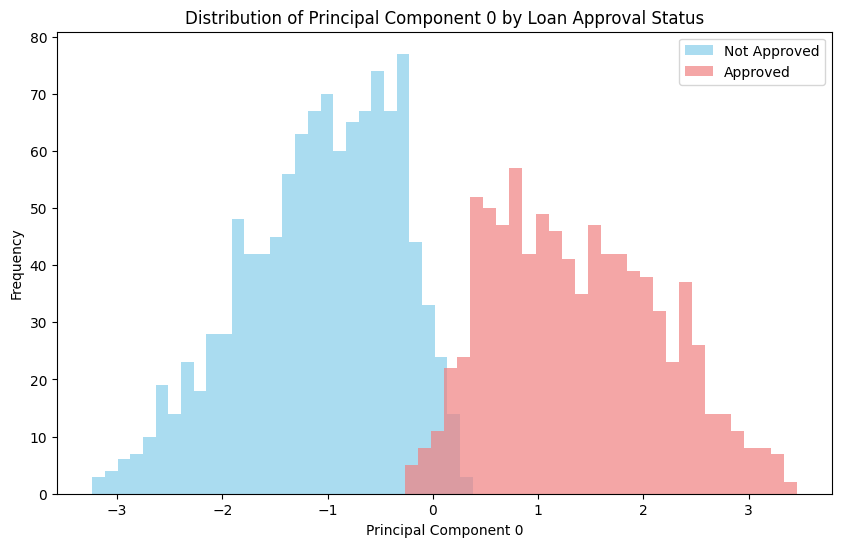

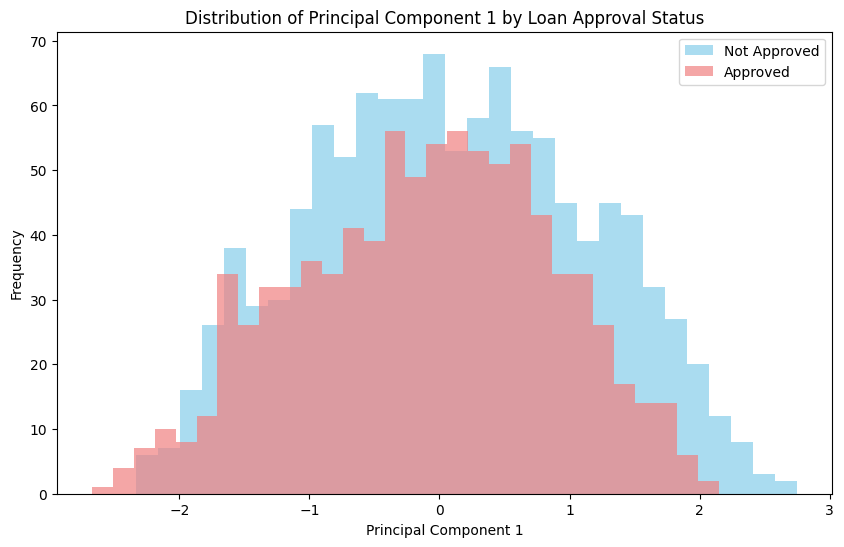

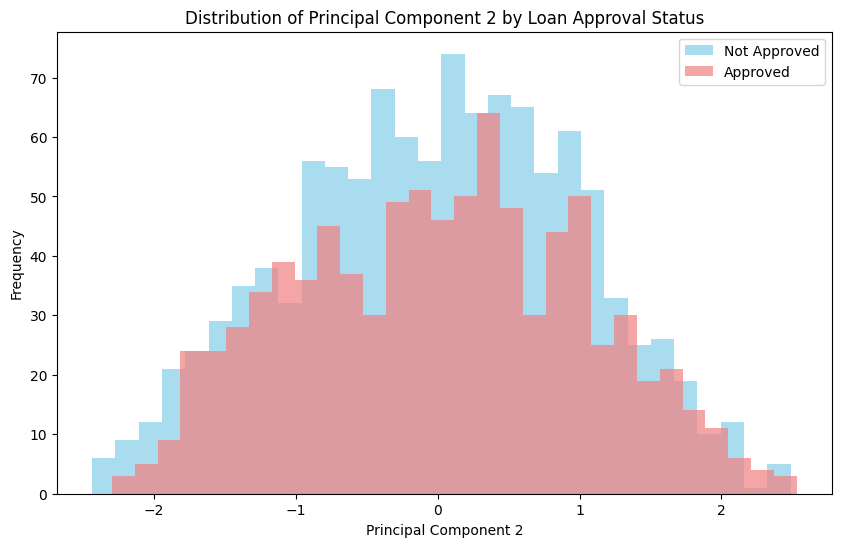

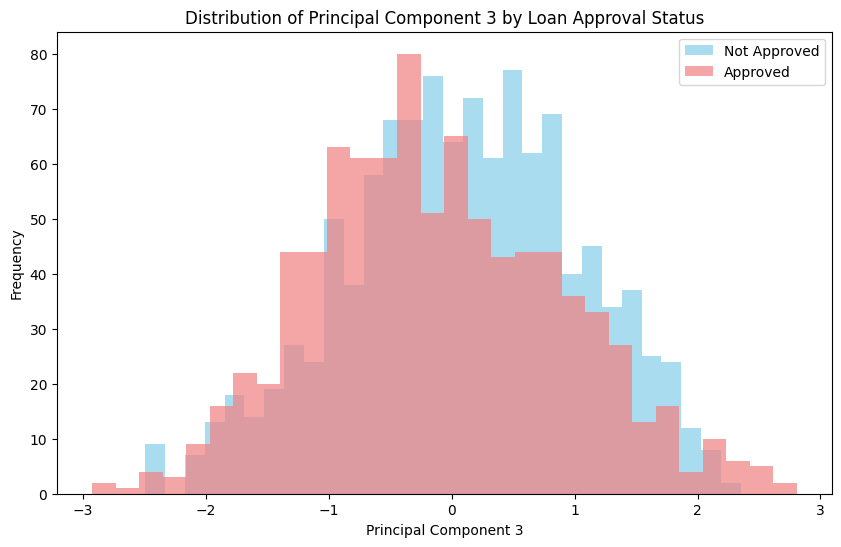

In [ ]:
import matplotlib.pyplot as plt

# Select a few components from the PCA-transformed data
selected_components = [0, 1, 2, 3]

# Visualize the distribution of selected components for each loan approval status
for component in selected_components:
    plt.figure(figsize=(10, 6))
    plt.hist(X[component][y == False], bins=30, alpha=0.7, label='Not Approved', color='skyblue')
    plt.hist(X[component][y == True], bins=30, alpha=0.7, label='Approved', color='lightcoral')
    plt.xlabel(f'Principal Component {component}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Principal Component {component} by Loan Approval Status')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

## Evaluate naive bayes model

### Subtask:
Evaluate the performance of the Naive Bayes model using the test data and calculate relevant metrics.


**Reasoning**:
Evaluate the performance of the trained Naive Bayes model using the test set by calculating accuracy, generating a classification report, and computing the confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(report_nb)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)

Naive Bayes Accuracy: 0.62
Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.73      0.68       217
        True       0.61      0.49      0.54       183

    accuracy                           0.62       400
   macro avg       0.62      0.61      0.61       400
weighted avg       0.62      0.62      0.61       400

Naive Bayes Confusion Matrix:
[[159  58]
 [ 94  89]]


## Compare model performance

### Subtask:
Compare the performance metrics (Accuracy, Precision, Recall, F1-Score, Confusion Matrix) of the Naive Bayes model with the Decision Tree model.


**Reasoning**:
Print the performance metrics for both models as requested.



In [ ]:
print("Decision Tree Accuracy:", accuracy)
print("Naive Bayes Accuracy:", accuracy_nb)

print("\nDecision Tree Classification Report:")
print(report)
print("\nNaive Bayes Classification Report:")
print(report_nb)

print("\nDecision Tree Confusion Matrix:")
print(conf_matrix)
print("\nNaive Bayes Confusion Matrix:")
print(conf_matrix_nb)

Decision Tree Accuracy: 0.9925
Naive Bayes Accuracy: 0.62

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       217
        True       1.00      0.98      0.99       183

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.73      0.68       217
        True       0.61      0.49      0.54       183

    accuracy                           0.62       400
   macro avg       0.62      0.61      0.61       400
weighted avg       0.62      0.62      0.61       400


Decision Tree Confusion Matrix:
[[217   0]
 [  3 180]]

Naive Bayes Confusion Matrix:
[[159  58]
 [ 94  89]]
